In [1]:
# Fill in your name using the given format
your_name = "LAST_NAME, FIRST_NAME"

# Assignment 1
We will study SVMs on the [Fashion-MNIST dataset](https://www.openml.org/d/40996).
As we saw in the first lab session, it contains 70,000 images of fashion products, classified into 10 
types of clothing, each represented by 28 by 28 pixel values. 

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openml
import time
import math
import tqdm
%matplotlib inline

# Pre-flight checklist. Do not change this code.
# Make sure that you have installed recent versions of key packages.
from packaging import version
import sklearn
sklearn_version = sklearn.__version__
if version.parse(sklearn_version) < version.parse("0.24.0"):
    print("scikit-learn is outdated. Please update now! pip install -U scikit-learn")
else:
    print("OK. You may continue :)")

OK. You may continue :)


In [3]:
# Download FMINST data. Takes a while the first time.
fmnist = openml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [4]:
# Plotting functions. Don't edit these.
%matplotlib inline
from IPython import display

def plot_live(X, y, evaluator, param_name, param_range, scale='log', ylim=(0,1), ylabel='score', marker = '.'):
    """ Renders a plot that updates with every evaluation from the evaluator.
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    evaluator -- a function with signature (X, y, param_value) that returns a dictionary of scores.
                 Examples: {"train": 0.9, "test": 0.95} or {"model_1": 0.9, "model_2": 0.7}
    param_name -- the parameter that is being varied on the X axis. Can be a hyperparameter, sample size,...
    param_range -- list of all possible values on the x-axis
    scale -- defines which scale to plot the x-axis on, either 'log' (logarithmic) or 'linear'
    ylim -- tuple with the lowest and highest y-value to plot (e.g. (0, 1))
    ylabel -- the y-axis title
    """
    # Plot interactively
    plt.ion()
    plt.ylabel(ylabel)
    plt.xlabel(param_name)
    
    # Make the scale look nice
    plt.xscale(scale)
    plt.xlim(param_range[0],param_range[-1])
    plt.ylim(ylim)
        
    # Start from empty plot, then fill it
    series = {}
    lines = {}
    xvals = []
    for i in param_range:
        scores = evaluator(X, y, i) 
        if i == param_range[0]: # initialize series
            for k in scores.keys():
                lines[k], = plt.plot(xvals, [], marker = marker, label = k)
                series[k] = []
        xvals.append(i)
        for k in scores.keys(): # append new data
            series[k].append(scores[k])
            lines[k].set_data(xvals, series[k])
        # refresh plot
        plt.legend(loc='best')
        plt.margins(0.1)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        
def plot_examples(images, labels, row_length=5):
    nr_rows = math.floor(len(images) /row_length)
    if (len(images) % row_length) > 0:
        nr_rows += 1
    fig, axes = plt.subplots(nr_rows, row_length, figsize=(10, 3* nr_rows))
    for i, n in enumerate(images):
        if len(images) > row_length:
            axes[math.floor(i/row_length)][i%row_length].imshow(n.reshape(28, 28), cmap=plt.cm.gray_r)
            axes[math.floor(i/row_length)][i%row_length].set_xlabel(labels[i])
            axes[math.floor(i/row_length)][i%row_length].set_xticks(())
            axes[math.floor(i/row_length)][i%row_length].set_yticks(())
        else:
            axes[i].imshow(n.reshape(28, 28), cmap=plt.cm.gray_r)
            axes[i].set_xlabel(labels[i])
            axes[i].set_xticks(())
            axes[i].set_yticks(())       
    plt.show();

### Question 1.1
Implement a function `evaluate_SVM` that evaluates an SVM with RBF kernel for a given C and gamma value and returns the train and test score of a 5-fold cross-validation using the accuracy metric.

In [5]:
# Implement
def evaluate_SVM(X, y, C, gamma):
    """ Evaluate an SVM with 5-fold cross-validation on the provided (X, y) data. 
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    gamma -- the value for the gamma parameter
    
    Returns: a dictionary with the mean train and test score, e.g. {"train": 0.9, "test": 0.95}
    """
    pass

In [6]:
# MODEL IMPLEMENTATION:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
def evaluate_SVM(X, y, C, gamma):
    """ Evaluate an SVM with 5-fold cross-validation on the provided (X, y) data. 
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    gamma -- the value for the gamma parameter
    
    Returns: a dictionary with the mean train and test score, e.g. {"train": 0.9, "test": 0.95}
    """
    score = cross_validate(SVC(gamma=gamma, C=C), X, y, return_train_score= True, n_jobs=-1)
    res = {'train': np.mean(score['train_score']),
           'test': np.mean(score['test_score'])}
    return res

Implement a function `plot_1` that plots the results of `evaluate_SVM` on a 1% stratified subsample of the FMNIST dataset for gamma values ranging from 1e-12 to 1e12 (25 values on a log scale), and C=1. You can use the plotting functions `plot_live` defined above, and add any helper functions you like. Note: using a 1% subsample indeed won't give you optimal performance, but this is meant to make the assignment more doable.

In [7]:
# Implement. Do not change the name or signature of this function.
def plot_1():
    pass
plot_1()

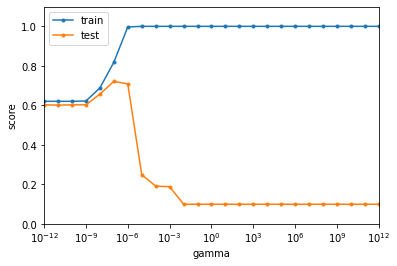

In [8]:
# MODEL IMPLEMENTATION
from sklearn.model_selection import train_test_split

# Helper function. Uses a closure to fix the C parameter
def evaluate_SVM_with_C(C):
    def f(X,y,gamma):
        return evaluate_SVM(X, y, C, gamma)
    return f
def evaluate_SVM_with_gamma(gamma):
    def f(X,y,C):
        return evaluate_SVM(X, y, C, gamma)
    return f

def plot_1():
    Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.01, random_state=0)
    param_name = 'gamma'
    param_range = np.logspace(-12, 12, num=25)
    plot_live(Xs, ys, evaluate_SVM_with_C(1), param_name, param_range, scale='log', ylim=(0,1.1))
plot_1()

### Question 1.2
Interpret the graph. Answer the following questions with multiple choice:  
- 'A': Underfitting
- 'B': Overfitting
- 'C': Neither underfitting nor overfitting
- 'D': No answer

For the gamma value 1e-9, is the model over- or underfitting?

In [9]:
# Fill in the correct answer. Don't change the name of the variable
q_1_2_1 = 'D'

In [10]:
# MODEL RESPONSE: test and train score are both low, hence underfitting
q_1_2_1 = 'A'

For the gamma value 1e3, is the model over- or underfitting?

In [11]:
# Fill in the correct answer. Don't change the name of the variable
q_1_2_2 = 'D'

In [12]:
# MODEL RESPONSE: train score is high and test score is lower that the optimum, hence overfitting
q_1_2_2 = 'B'

### Question 1.3
Implement a function `plot_1_3` that plots the graph similar as in question 1.1, but this time, fix `gamma` to the optimal value you observed in question 1.1, and vary `C` from 1e-12 to 1e12 (25 values on a log scale).

In [13]:
# Implement. Do not change the name or signature of this function.
def plot_1_3():
    pass
plot_1_3()

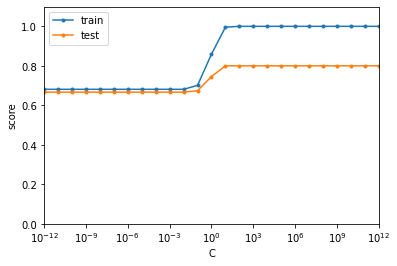

In [14]:
# MODEL IMPLEMENTATION
def plot_1_3():
    Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.01)
    param_name = 'C'
    param_range = np.logspace(-12, 12, num=25)
    plot_live(Xs, ys, evaluate_SVM_with_gamma(1e-7), param_name, param_range, scale='log', ylim=(0,1.1))
plot_1_3()

### Question 1.4
Interpret the graph. 

For the C value 1e6, is the model over- or underfitting?
- 'A': Strongly underfitting
- 'B': Strongly overfitting
- 'C': Neither underfitting nor overfitting
- 'D': No answer

In [15]:
# Fill in the correct answer. Don't change the name of the variable
q_1_4_1 = 'D'

In [16]:
# MODEL RESPONSE: C is the best answer. There is a tiny bump at C=100 but the model is not strongly overfitting.
q_1_4_1 = 'C'

Explain your observations as a string in `answer_q_1_4`. What is the effect of using high C values on performance? How do you explain this? Use no more than 800 characters.

In [17]:
answer_q_1_4 = """
               Your answer 
               """
print("Answer is {} characters long".format(len(answer_q_1_4)))

Answer is 44 characters long


In [18]:
# MODEL IMPLEMENTATION
answer_q_1_4 = """
               By increasing C (less regularization), the model is more likely to overfit. However, this is countered by using a small enough gamma 
               (wider kernels, more regularization). We see that the model never really overfits. This shows that the kernel width (gamma) is a 
               very good regularizer by itself. As C gets larger, the margin will get narrower until it can shrink no further because there are no 
               more data points left in the margin. After that, all models are identical, hence the flat line.
               """

## Question 2
Train a linear SVM with two different methods and compare them in terms of performance and scalability
- SVM with quadratic programming, as in `SVC`
- SVM with stochastic gradient descent

Think about which settings (loss functions, kernels, other settings) you need to use. Otherwise, you can leave hyperparameters at their defaults. 
Train both methods on 10 increasingly large stratified subsamples of the dataset, from 1% to 10%. Make sure that the larger samples contain all data from the smaller samples.

### Question 2.1
Implement a function `plot_2_1` that produces two plots. The first plot should show training time vs dataset size (or percentage). To get meaningful timing information, run both methods on the same machine with the same number of cores. You can use the standard 'time' package to measure runtime. The second plot should show the test set accuracy vs dataset size (or percentage). The test set consists of all the points not used for testing that model (hence 99% initially). Don't forget to add axis labels and legends.

In [19]:
# Implement. Do not change the name or signature of this function.
def plot_2_1():
    pass
plot_2_1()

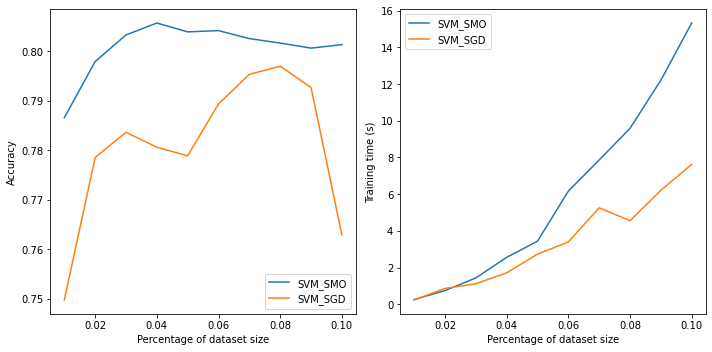

In [20]:
# MODEL IMPLEMENTATION
import time
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
# Helper function, returns test set accuracy and training for the given classifier and the given percentage split
def fit_time(clf,X,y,percentage):
    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=percentage, random_state=0)
    start = time.time()
    clf.fit(X_train,y_train)
    train_time = time.time()-start
    acc = clf.score(X_test,y_test)
    return train_time, acc
    
def plot_2_1():
    scores_SVC = []
    scores_SGD = []
    times_SVC = []
    times_SGD = []
    sizes = np.linspace(0.01,0.1,10)
    for p in tqdm(sizes):
        time, acc = fit_time(SVC(kernel='linear'),X,y,p)
        times_SVC.append(time)
        scores_SVC.append(acc)
        time, acc = fit_time(SGDClassifier(loss='hinge'),X,y,p)
        times_SGD.append(time)
        scores_SGD.append(acc)
        
    fig, axes = plt.subplots(1, 2,  figsize=(10, 5))
    axes[0].plot(sizes,scores_SVC,label="SVM_SMO")
    axes[0].plot(sizes,scores_SGD,label="SVM_SGD")
    axes[0].set_xlabel("Percentage of dataset size")
    axes[0].set_ylabel("Accuracy")
    axes[0].legend()
    axes[1].plot(sizes,times_SVC,label="SVM_SMO")
    axes[1].plot(sizes,times_SGD,label="SVM_SGD")
    axes[1].set_xlabel("Percentage of dataset size")
    axes[1].set_ylabel("Training time (s)")
    axes[1].legend()
    plt.tight_layout()
    
plot_2_1()

### Question 2.2
Interpret the graphs. Which of the following is correct. Multiple correct answers are possible. You can run additional experiments if you are not sure. You can leave an optional clarification in `q_2_2_comment`.
- 'A': The quadratic programming SVM is better at learning from small datasets, but is also a low slower than SGD
- 'B': The quadratic programming SVM is about equally good and trains equally fast as SGD
- 'C': The quadratic programming SVM is about equally good and trains faster than SGD
- 'D': The SGD SVM is equally good as the quadratic programming SVM given sufficent data, and faster
- 'E': The SGD SVM is better at learning from small datasets, and trains equally fast as the quadratic programming SVM
- 'F': The SGD SVM is worse at learning from small datasets, but given more data it will be equally good in the same amount of time
- 'G': The linear kernel performs much worse than the RBF kernel used in the previous questions

In [21]:
# Fill in the correct answer. Don't change the name of the variable. For multiple answers, use comma-separated values as shown.
q_2_2 = 'A,B,C,D'
q_2_2_comment = '' # Optional. Only use when you feel that you need to clarify something.

In [22]:
# MODEL ANSWER
q_2_2 = 'A,D,F'
q_2_2_comment = 'SVM_SMO (quadratic programming) is almost 3% better on small datasets, but less than 1% on larger datasets, and SVM_SGD is faster. Results may vary, but in these experiments both linear and RFB kernels reach about 80% accuracy.' 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=.8, random_state=0)
sgd = SGDClassifier(loss='hinge').fit(X_train,y_train)
acc = sgd.score(X_test,y_test)
acc

0.8075

## Question 3
Inspect the SVM model to see whether it has learned the right thing.

First, relabel the data into a binary problem. Make class 1 "Trouser" the positive class and all other classes the negative class.
Next, train an SVM using C=1 and gamma=1e-7 on a 1% stratified subsample (as before).

Implement a function `plot_3_` that plots the 5 support vectors with the highest dual coefficients (as images), as well as the 5 support vectors with the lowest dual coefficients. You can use the plotting function `plot_examples` (see above) and add the values of the dual coefficients as labels. If there are more than 5 support vectors with the highest/lowest value you can choose any of them. For plotting, you can use the `plot_examples` method given above.

Explain your observations as a string in `answer_q_3`. What do the support vectors teach you about the model? How does it actually makes its predictions? Use no more than 800 characters.

In [24]:
# Implement. Do not change the name or signature of this function.
def plot_3_1():
    pass
plot_3_1()

answer_q_3 = """
             Your answer 
             """
print("Answer is {} characters long".format(len(answer_q_3)))

Answer is 40 characters long


Positive support vectors


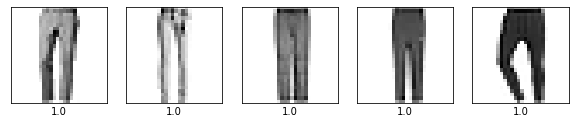

Negative support vectors


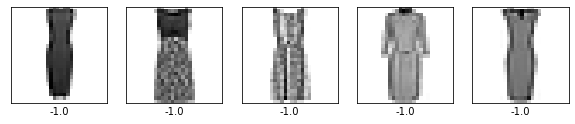

In [25]:
# MODEL IMPLEMENTATION
def plot_3_1():
    # Relabel and fit. Using 10% here for more stable results. Change to 0.01 for 1%.
    Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1, random_state=0)
    svm = SVC(gamma=1e-7).fit(Xs,ys == '1')
    coef = svm.dual_coef_[0]
    # Top positive
    print("Positive support vectors")
    top = np.argsort(-coef)[:5]
    plot_examples(svm.support_vectors_[top],coef[top])
    # Top negative
    print("Negative support vectors")
    bottom = np.argsort(coef)[:5]
    plot_examples(svm.support_vectors_[bottom],coef[bottom])
plot_3_1()

In [26]:
answer_q_3 = """
             The positive support vectors are all showing trousers. This should the case by definition. Interestingly, the negative examples are all dresses. 
             Hence, dresses are the most similar to trousers in the data, and the model makes predictions by checking whether a new image is closer 
             to being trousers than dresses.
             """